# Multi Layer Perceptron Implementation

## Download the Data

In [15]:
from ucimlrepo import fetch_ucirepo 
  
# Downlaod the Dataset 
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572) 
  
# Get the features and target variables
X = taiwanese_bankruptcy_prediction.data.features 
y = taiwanese_bankruptcy_prediction.data.targets 
  

## Pre-process the data

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Identify the indices of each class
minority_class_indices = np.where(y_train == 1)[0]
majority_class_indices = np.where(y_train == 0)[0]

# Calculate to do a 80/20 split
majority_class_size = round(len(minority_class_indices) * 60/40) 

# Randomly sample from majority class without replacement to match minority class size
np.random.seed(69)
majority_class_indices_undersampled = np.random.choice(majority_class_indices,
                                                       size= majority_class_size,
                                                       replace=False)

# Combine the minority class indices with the downsampled majority class indices
undersampled_indices = np.concatenate([minority_class_indices, majority_class_indices_undersampled])

# Create the undersampled training set
X_train_undersampled = X_train.iloc[undersampled_indices]
y_train_undersampled = y_train.iloc[undersampled_indices]

## Build the Model

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.metrics import Precision, Recall
from keras import backend as K
from keras.regularizers import l2


"""
Function calculates the f1 score
Param: precision
        recall
    return f1 score
"""
def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall + K.epsilon())



def evaluate_model(model):

    # Reset the session
    K.clear_session()
    
    # Compile the model
    model.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy', Precision(), Recall()])

    # Train the model
    #model.fit(X_train, y_train, epochs=25, batch_size=32)
    model.fit(X_train_undersampled, y_train_undersampled, epochs=25, batch_size=32)

    
    # Evaluate the model
    loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
    #print(f"Test loss: {loss}, Test accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")


    # get the f1 score
    f1_score = calculate_f1_score(precision, recall)
    #print(f"F1 Score: {f1_score}")
    return loss, accuracy, precision, recall, f1_score


## Build different Model Structures

In [18]:
def create_model_1():
    model_1 = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dense(8, activation='sigmoid'),
        Dense(1, activation='sigmoid')

    ])
    return model_1

def create_model_2():
    model_2 = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(8, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model_2

def create_model_3():
    model_3 = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(8, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model_3

def create_model_4():
    model_4 = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),  
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),  
        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),  
        Dropout(0.5),  
        Dense(8, activation='relu', kernel_regularizer=l2(0.001)), 
        Dropout(0.5),  
        Dense(1, activation='sigmoid')
    ])
    return model_4


## Train the different Models

In [19]:
model_1 = create_model_1()
model_2 = create_model_2()
model_3 = create_model_3()
model_4 = create_model_4()

models = [model_1, model_2, model_3, model_4]
model_metrics = []

for model in models:
    loss, accuracy, precision, recall, f1_score = evaluate_model(model)
    model_metrics.append([accuracy, precision, recall, f1_score])

Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.4826 - loss: 0.7729 - precision: 0.3528 - recall: 0.5097
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.4962 - loss: 0.7531 - precision: 0.4238 - recall: 0.5283
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.5110 - loss: 0.7465 - precision: 0.4118 - recall: 0.4757
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.4935 - loss: 0.7771 - precision: 0.3647 - recall: 0.3571
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.4901 - loss: 0.7638 - precision: 0.3603 - recall: 0.3690
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.5299 - loss: 0.7422 - precision: 0.3996 - recall: 0.3564
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.5320 - loss: 0.7334 - precision: 0.3624 - recall: 0.3185
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.5367 - loss: 0.7298 - precision: 0.3807 - recall: 0.3301
Epoch 9/25
14/14

## Display the results of the different models

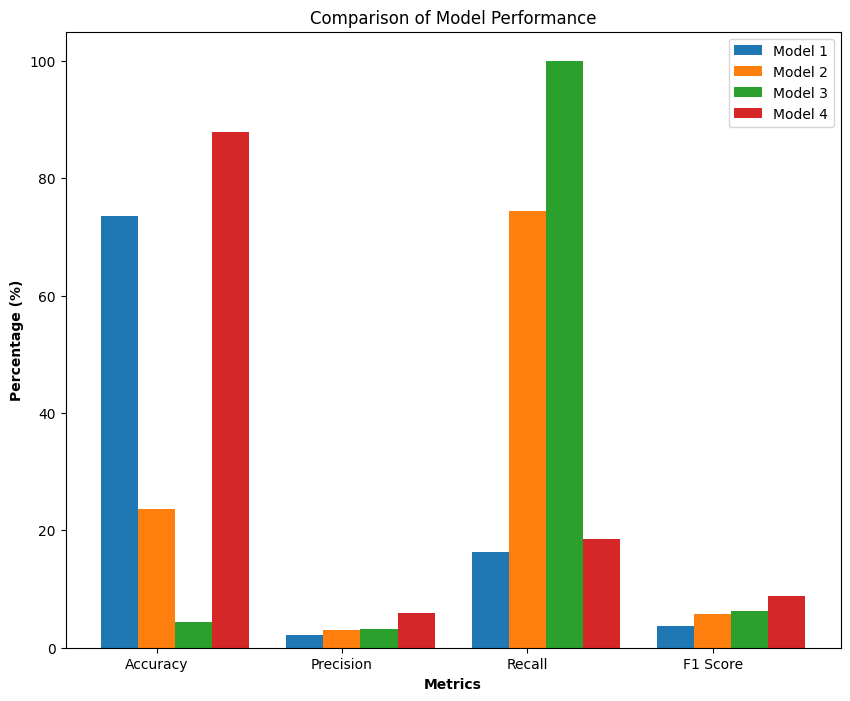

In [20]:
import matplotlib.pyplot as plt
import numpy as np


# Convert metrics to percentages for visualization
model_metrics_percentages = [[metric * 100 for metric in model] for model in model_metrics]

# Metrics labels (excluding Loss)
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models_labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Setting up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis
r = np.arange(len(metrics_labels))

for i, model in enumerate(model_metrics_percentages):
    # Plot each model's metrics
    plt.bar(r + i * bar_width, model, width=bar_width, label=models_labels[i])

plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(metrics_labels))], metrics_labels)

plt.legend()
plt.title('Comparison of Model Performance')
plt.show()



In [21]:
model_1.summary()
model_2.summary()
model_3.summary()
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,045 (19.71 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,364 (13.14 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,045 (19.71 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,364 (13.14 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,237 (43.90 KB)

 Trainable params: 3,745 (14.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,492 (29.27 KB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,693 (104.27 KB)

 Trainable params: 8,897 (34.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,796 (69.52 KB)